# Project:  Analyzing Medical Appointment No Shows Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> In this section of the report, I provide a brief introduction to the dataset I've selected for analysis (No Show Appointments). This dataset collects information from 100k medical appointments in Brazil and is focused on what are the characteristics of a patient that is likely to show up.
> 
The following questions will be answered throughout my analysis <ul>
<li> What are the important characteristics that will predict if a patient will show up ? </li>
<li> Which day of the week patients will be more likely to meet doctors ?</li>
<li> Which chronic disease is more common for patients above 50 years (Diabetes or  Hipertension or Both) ?</li>
</ul>
<ul>
Data Dictionary
<li>01 - PatientId: Identification of a patient</li>
<li>02 - AppointmentID: Identification of each appointment </li>
<li>03 - Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.</li>
<li>04 - ScheduledDay: The day of the actuall appointment, when they have to visit the doctor.</li>
<li>05 - AppointmentDay: The day someone called or registered the appointment, this is before appointment of course.</li>
<li>06 - Age: How old is the patient.</li>
<li>07 - Neighbourhood: Where the appointment takes place.</li>
<li>08 - Scholarship: True of False . Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia</li>
<li>09 - Hipertension: True or False</li>
<li>10 - Diabetes: True or False</li>
<li>11 - Alcoholism: True or False</li>
<li>12 - Handcap: True or False</li>
<li>13 - SMS_received: 1 or more messages sent to the patient.</li>
<li>14 - No-show: True or False.</li>
</ul>





In [35]:
# Importing Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

>In this section of the report, I load in the data, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [36]:
# Loading Dataset

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [37]:
# Exploring Dataset

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [38]:
# Exploring Columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [39]:
# Number of rows and columns

df.shape

(110527, 14)

In [40]:
# Summary of data

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [41]:
# Checking datatypes and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [42]:
# Checking number of unique values for each column

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Change datatype of ScheduledDay and AppointmentDay columns to datetime using pandas
> No Missing values or duplicates found.

In [43]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [44]:
# Checking for duplicates 

df.duplicated().any()

False

### Remove unneeded columns in the analysis

In [45]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

### Change No-show and Gender columns to 0 [showed up and Female] and 1 [not showed up and Male]
> This will help me to get summary statistics on No-show and Gender columns.


In [46]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [47]:
df['No-show'] = df['No-show'].apply(lambda x: 0 if x=='No' else 1)

In [48]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [49]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='F' else 1)

In [50]:
df.describe()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,0.350023,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,0.476979,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


### Drop any age below  0 

In [51]:
ages_below_0 = df[df['Age'] < 0]
ages_below_0

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,0,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,0


In [52]:
df.drop(index = ages_below_0.index[0], axis=0,inplace = True)
df[df['Age'] < 0]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


### Add DayOfWeek Column

In [53]:
df['DayOfWeek'] = df['ScheduledDay'].dt.day_name()
df['DayOfWeek'].unique()

array(['Friday', 'Wednesday', 'Tuesday', 'Thursday', 'Monday', 'Saturday'],
      dtype=object)

<a id="eda"></a>
## Exploratory Data Analysis
> Now that I've trimmed and cleaned the data,and  we are ready to move on to exploration. I will Compute statistics and create visualizations with the goal of addressing the research questions that I posed in the Introduction section.
### Q1. What are the important characteristics that will predict if a patient will show up ?

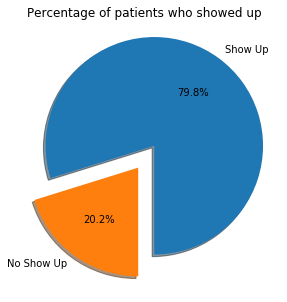

In [54]:
# Exploring Percentage of patients who showed up
show_df = df[df['No-show'] == 0]
no_show_df = df[df['No-show'] == 1]
show_up_percent = (show_df.shape[0]/df.shape[0])*100
not_show_up_percent = (no_show_df.shape[0]/df.shape[0])*100
plt.figure(figsize=(5,5))
plt.pie(x=[show_up_percent, not_show_up_percent], labels=['Show Up', 'No Show Up'],autopct='%1.1f%%', shadow=True, startangle=270, explode=(0.15, 0.1))
plt.title('Percentage of patients who showed up')
plt.show()

In [55]:
# I will create a function to plot each feature if it has an effect on showing up
def plotFeature(col, labels):
    plt.figure(figsize=(8,6))
    plt.bar([labels[0], labels[1]], [show_df[show_df[col] == 0][col].count(), show_df[show_df[col] == 1][col].count()], label='Showed up')
    plt.bar([labels[0], labels[1]], [no_show_df[no_show_df[col] == 0][col].count(), no_show_df[no_show_df[col] == 1][col].count()], label='Did not show up')
    plt.title("Distribution of "+ col +" who likely to show vs not to show")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend()
    plt.show()

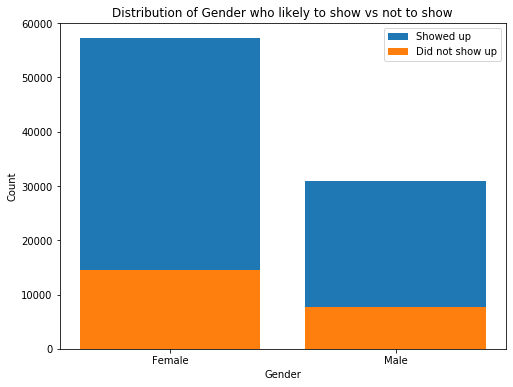

In [56]:
# Exploring the effect of Gender feature on showing up

plotFeature('Gender', ['Female', 'Male'])

#### As the above figure shows that the number of females is higher than males, I will split the gender into groups not who are more comitted inside each group

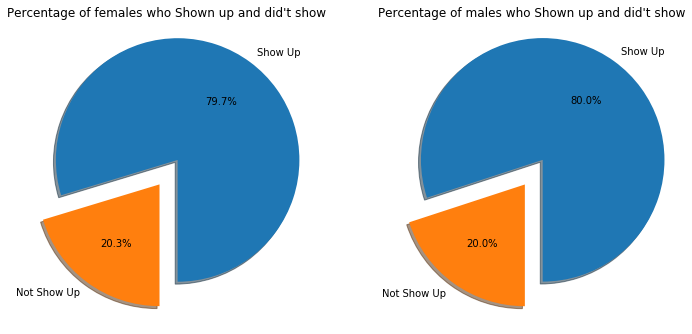

In [57]:
genders_shown_up = df.groupby(['Gender', 'No-show'])['Age'].count()
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
ax1.pie(x=[genders_shown_up[0][0], genders_shown_up[0][1]], labels=['Show Up', 'Not Show Up'], autopct='%1.1f%%', shadow=True, startangle=270, explode=(0.15, 0.1))
ax1.set_title("Percentage of females who Shown up and did't show")
ax2.pie(x=[genders_shown_up[1][0], genders_shown_up[1][1]], labels=['Show Up', 'Not Show Up'], autopct='%1.1f%%', shadow=True, startangle=270, explode=(0.15, 0.1))
ax2.set_title("Percentage of males who Shown up and did't show")
plt.show()

#### From the figure above we can conclude that both genders are committed, however, females maybe a bit more committed as the count of females in this dataset is a way more higher and at the end both are comitted with the same percentage.

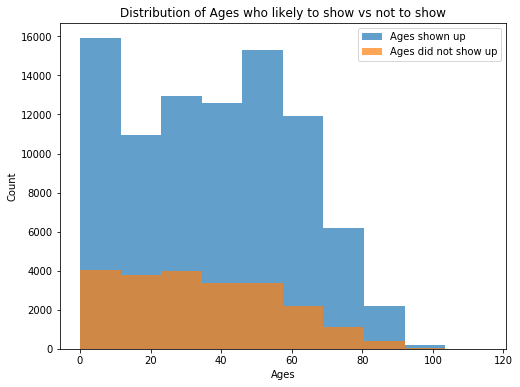

In [58]:
# Exploring the distribution of the ages going to doctors

plt.figure(figsize=(8,6))
plt.hist(show_df['Age'], label='Ages shown up', alpha=0.7)
plt.hist(no_show_df['Age'], label='Ages did not show up', alpha=0.7)
plt.title('Distribution of Ages who likely to show vs not to show')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.legend()
plt.show()

#### From the figure above we can canclude that most of the ages that go to doctors are below 10 years or from 50 to 60 years. However, we can not assume that there is a certain age range who is likely to miss the meet.

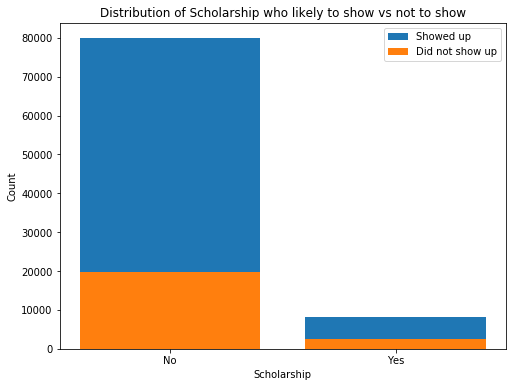

In [59]:
# Exploring the effect of Scholarship feature on showing up

plotFeature('Scholarship', ['No', 'Yes'])

#### From the figure above we can say that people who don't have Scholarshhip is likely to show up, therefore, having no scholarship did not affect the commitment of patients.

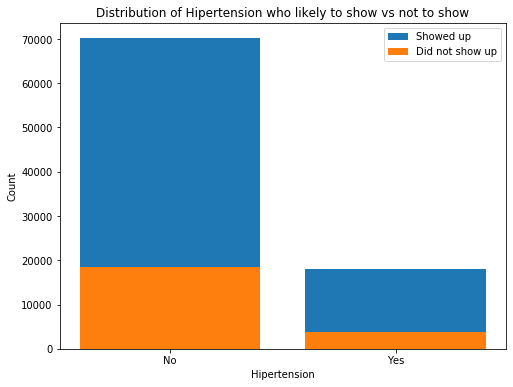

In [60]:
# Exploring the effect of Hipertension feature on showing up

plotFeature('Hipertension', ['No', 'Yes'])

#### From the small portion of patients that have Hypertension we can say that they are more committed and this is not a barrier for them to miss the appointment.

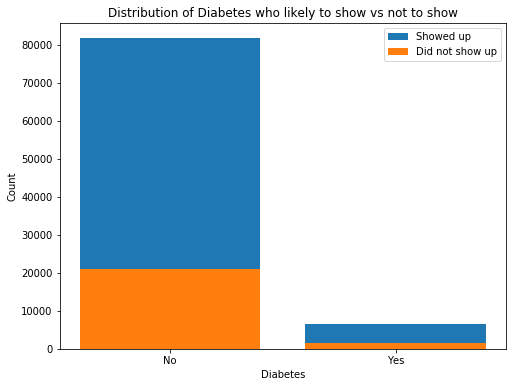

In [61]:
# Exploring the effect of Diabetes feature on showing up

plotFeature('Diabetes', ['No', 'Yes'])

#### It is clear that chronic diseases are not a barrier for patients for not showing up as they want to care more about their health.

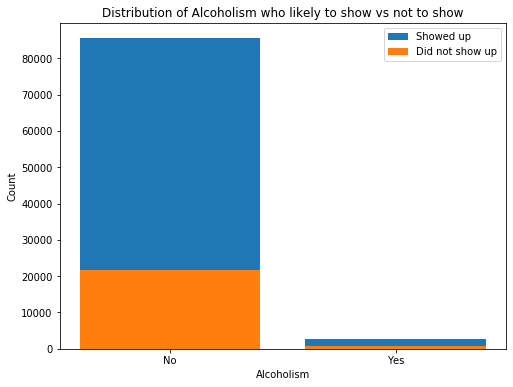

In [62]:
# Exploring the effect of Alcoholism feature on showing up

plotFeature('Alcoholism', ['No', 'Yes'])

#### The percentage of patients who have alcoholismin their blood is too small, however, from the available small portion we can conclude that they have self control and are aware of their meetings.

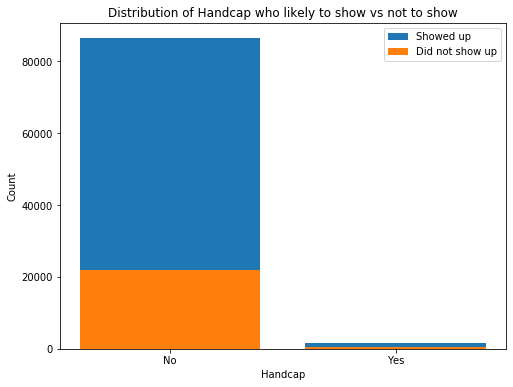

In [63]:
# Exploring the effect of Handcap feature on showing up

plotFeature('Handcap', ['No', 'Yes'])

#### We can not derive any conclusions from the figure above due to te percentage of handcap patients is small.

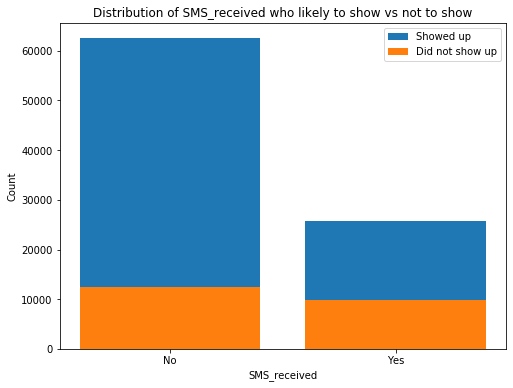

In [64]:
# Exploring the effect of SMS_received feature on showing up

plotFeature('SMS_received', ['No', 'Yes'])

#### Another interesting finding is that patients who didn't receieve an sms reminder before the appoitment are more committed to their meeting timing than the patients who received prior to their scheduled day.

### Q2. Which day of the week patients will be more likely to meet doctors ?

In [65]:
count_days = df.groupby('DayOfWeek')['Gender'].count()
count_days

DayOfWeek
Friday       18915
Monday       23084
Saturday        24
Thursday     18073
Tuesday      26168
Wednesday    24262
Name: Gender, dtype: int64

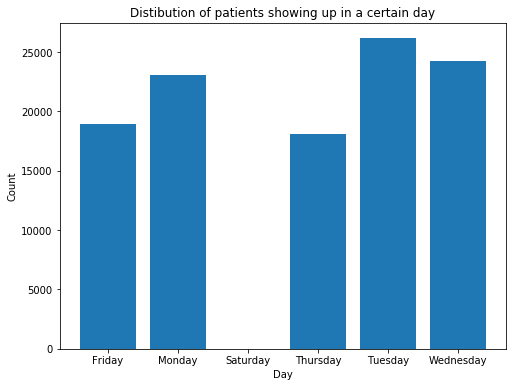

In [66]:
plt.figure(figsize=(8,6))
plt.bar(count_days.index, count_days.values)
plt.title("Distibution of patients showing up in a certain day")
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

#### We can conclude that patients do not prefer to visit doctors at weekends on Saturday and Sunday. Due to the fact, less staff and doctors are available at weekends or patients may prefer to take a rest from work and rest at home.

### Q3. Which chronic disease is more common for patients above 50 years (Diabetes or  Hipertension or Both or Neither) ?

In [67]:
df_above_50_hipertension= df[((df['Age'] >= 50) & (df['Hipertension'] == 1) & (df['Diabetes'] == 0))]
df_above_50_diabetes= df[((df['Age'] >= 50) & (df['Hipertension'] == 0) & (df['Diabetes'] == 1))]
df_above_50_diabetes_hipertension= df[((df['Age'] >= 50) & (df['Hipertension'] == 1) & (df['Diabetes'] == 1))]
df_above_50= df[((df['Age'] >= 50) & (df['Hipertension'] == 0) & (df['Diabetes'] == 0))]

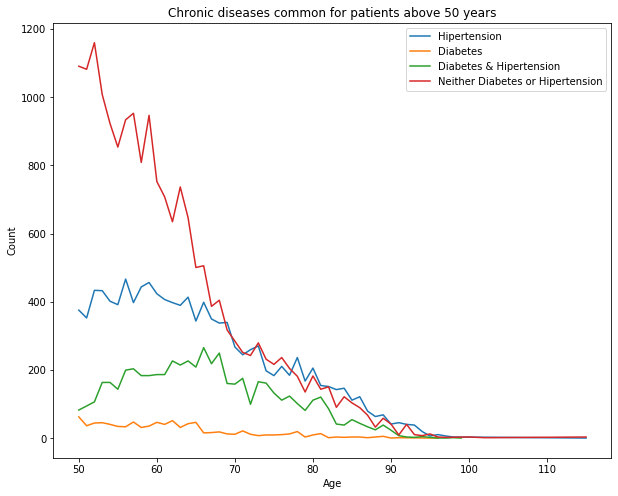

In [68]:
# Grouping by Age to find count at each age
age_hipertension = df_above_50_hipertension.groupby('Age').size()
age_diabetes = df_above_50_diabetes.groupby('Age').size()
age_diabetes_hipertension = df_above_50_diabetes_hipertension.groupby('Age').size()
age_no_chronic_diseases = df_above_50.groupby('Age').size()

# Plotting
plt.figure(figsize=(10,8))
plt.plot(age_hipertension.index, age_hipertension.values, label='Hipertension')
plt.plot(age_diabetes.index, age_diabetes.values, label='Diabetes')
plt.plot(age_diabetes_hipertension.index, age_diabetes_hipertension.values, label='Diabetes & Hipertension')
plt.plot(age_no_chronic_diseases.index, age_no_chronic_diseases.values, label='Neither Diabetes or Hipertension')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Chronic diseases common for patients above 50 years')
plt.legend()
plt.show()


#### We can find that most of patients from 50 to 70 years have no chronic disease. However, starting from 70 the gap started to decrease between "Neither Diabetes or Hipertension" and "Hipertension", as patients above 70 are more exposed to have a chronic disease.

<a id='conclusions'></a>
## Conclusions
In conclusion this dataset is very interesting as I found insightful findings. However, there are some limitations such as there is distance feature which state the distance between the patient's home and the doctor. As well as, we needed more features for diseases to be included as coloumns in the dataset. The points mentioned below are the outcome from my analysis on this dataset.
<ul>
<li>1. The number of females is higher than males in this dataset, After splitting the gender into 2 groups to know who are more comitted inside each group. We can conclude that both genders are committed with the same percentage (80%). However, females maybe a bit more committed as the count of females in this dataset is a way more higher as they care more about their health. Thus, gender is an important factor.</li>
<li>2. Most of the ages that go to doctors are below 10 years or from 50 to 60 years. However, we can not assume that there is a certain age range who is likely to miss the appointment. Another interesting finding is patients above 80 don't care about their health. Therefore, we can conclude that age is an essential feature in the analysis.</li>
<li>3. People who don't have Scholarshhip is likely to show up, therefore, having no scholarship did not affect the commitment of patients. </li>
<li>4. From the small portion of patients that have Hypertension or Diabetes we can say that they are more likely to show up and chronic diseases are not a barrier for them to miss the appointment.</li>
<li>5. The percentage of patients who have alcoholismin in their blood is too small, however, from the available small portion we can conclude that they have self control and are aware of their meetings.</li>
<li>6. Another interesting finding is that patients who didn't receieve an sms reminder before the appoitment are more committed to their meeting timing than the patients who received prior to their scheduled day. This means that most of patients don't need a reminders to attend their appointments.</li>
<li>7. We can conclude that patients do not prefer to visit doctors at weekends on Saturday and Sunday. Due to the fact, less staff and doctors are available at weekends or patients may prefer to take a rest from work and rest at home. </li>
<li>8. We can find that most of patients from 50 to 70 years have no chronic disease. However, starting from 70 the gap started to decrease between "Neither Diabetes or Hipertension" and "Hipertension", as patients above 70 are more exposed to have a chronic disease and less care about their health(fact 2).</li>
</ul>
